**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()
import io
data = pd.read_csv(io.BytesIO(uploaded['survey lung cancer.csv']))
print(data.head())

Saving survey lung cancer.csv to survey lung cancer.csv
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LU

**Dataset Summary**

In [3]:
print(f"Shape of The Dataset : {data.shape}")
print(f"\nGlimpse of The Dataset :")
data.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Shape of The Dataset : (309, 16)

Glimpse of The Dataset :


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
print(f"Summary of This Dataset :")
data.describe().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

Summary of This Dataset :


,count,mean,std,min,25%,50%,75%,max
AGE,309.000000,62.673139,8.210301,21.000000,57.000000,62.000000,69.000000,87.000000
SMOKING,309.000000,1.563107,0.496806,1.000000,1.000000,2.000000,2.000000,2.000000
YELLOW_FINGERS,309.000000,1.569579,0.495938,1.000000,1.000000,2.000000,2.000000,2.000000
ANXIETY,309.000000,1.498382,0.500808,1.000000,1.000000,1.000000,2.000000,2.000000
PEER_PRESSURE,309.000000,1.501618,0.500808,1.000000,1.000000,2.000000,2.000000,2.000000
CHRONIC DISEASE,309.000000,1.504854,0.500787,1.000000,1.000000,2.000000,2.000000,2.000000
FATIGUE,309.000000,1.673139,0.469827,1.000000,1.000000,2.000000,2.000000,2.000000
ALLERGY,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000
WHEEZING,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000
ALCOHOL CONSUMING,309.000000,1.556634,0.497588,1.000000,1.000000,2.000000,2.000000,2.000000


In [5]:
data.describe(include=object).T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,count,unique,top,freq
GENDER,309,2,M,162
LUNG_CANCER,309,2,YES,270


In [6]:
data.isna().sum().to_frame().T.style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
dup = data[data.duplicated()].shape[0]
print(f"There are {dup} duplicate entries among {data.shape[0]} entries in this dataset.")

data.drop_duplicates(keep='first',inplace=True)
print(f"\nAfter removing duplicate entries there are {data.shape[0]} entries in this dataset.")

There are 33 duplicate entries among 309 entries in this dataset.

After removing duplicate entries there are 276 entries in this dataset.


**Dataset Deeply Analysis**

In [8]:
data_temp = data.copy()
data_temp["GENDER"] = data_temp["GENDER"].replace({"M" : "Male" , "F" : "Female"})

for column in data_temp.columns:
    data_temp[column] = data_temp[column].replace({2: "Yes" , 1 : "No"})

data_temp.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO


**Custom Palette For Visualization**

In [10]:
sns.set_style("whitegrid")
sns.set_context("poster",font_scale = .7)
palette = ["#1d7874","#679289","#f4c095","#ee2e31","#ffb563","#918450","#f85e00","#a41623","#9a031e","#d6d6d6","#ffee32","#ffd100","#333533","#202020"]

**Positive Lung Cancer Cases**

In [11]:
data_temp_pos = data_temp[data_temp["LUNG_CANCER"] == "YES"]
data_temp_pos.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
5,Female,75,No,Yes,No,No,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,YES
6,Male,52,Yes,No,No,No,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,YES
7,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,YES


**Positive Cases' Age Distribution**

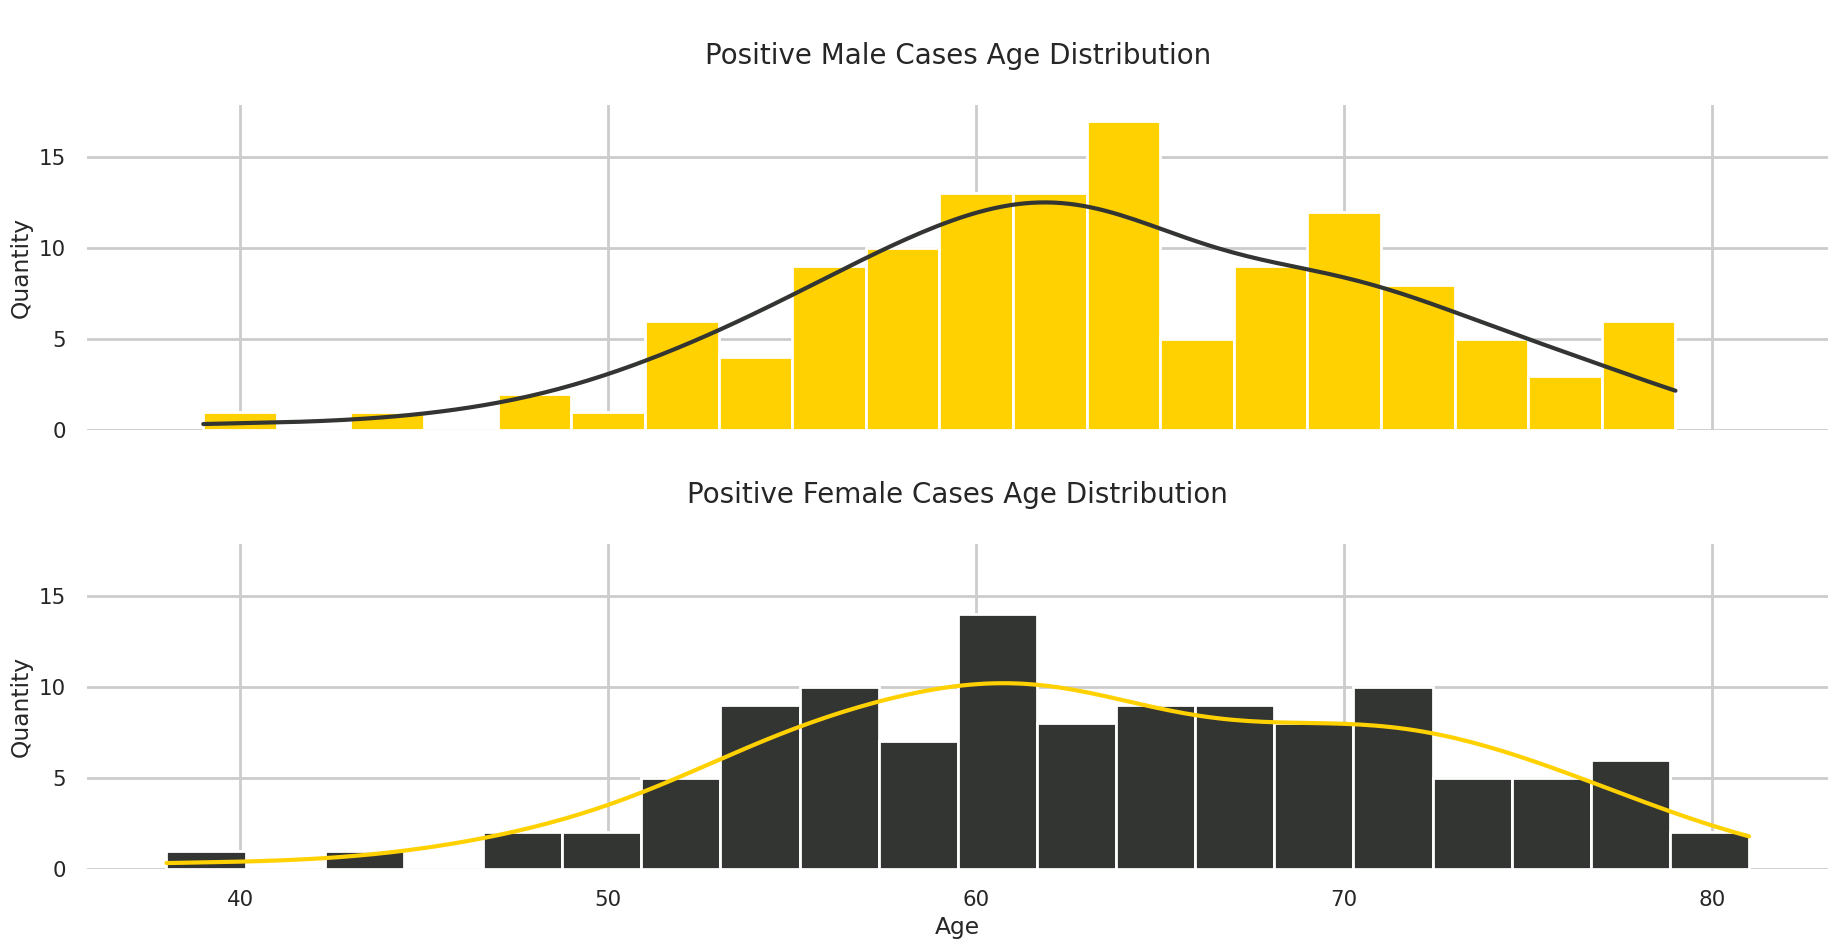

In [12]:
_, axs = plt.subplots(2,1,figsize=(20,10),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["AGE"],color=palette[11],kde=True,ax=axs[0],bins=20,alpha=1,fill=True)
axs[0].lines[0].set_color(palette[12])
axs[0].set_title("\nPositive Male Cases Age Distribution\n",fontsize=20)
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Quantity")

sns.histplot(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["AGE"],color=palette[12],kde=True,ax=axs[1],bins=20,alpha=1,fill=True)
axs[1].lines[0].set_color(palette[11])
axs[1].set_title("\nPositive Female Cases Age Distribution\n",fontsize=20)
axs[1].set_xlabel("Age")
axs[1].set_ylabel("Quantity")

sns.despine(left=True, bottom=True)
plt.show()

**Positive Cases' Gender Distribution**

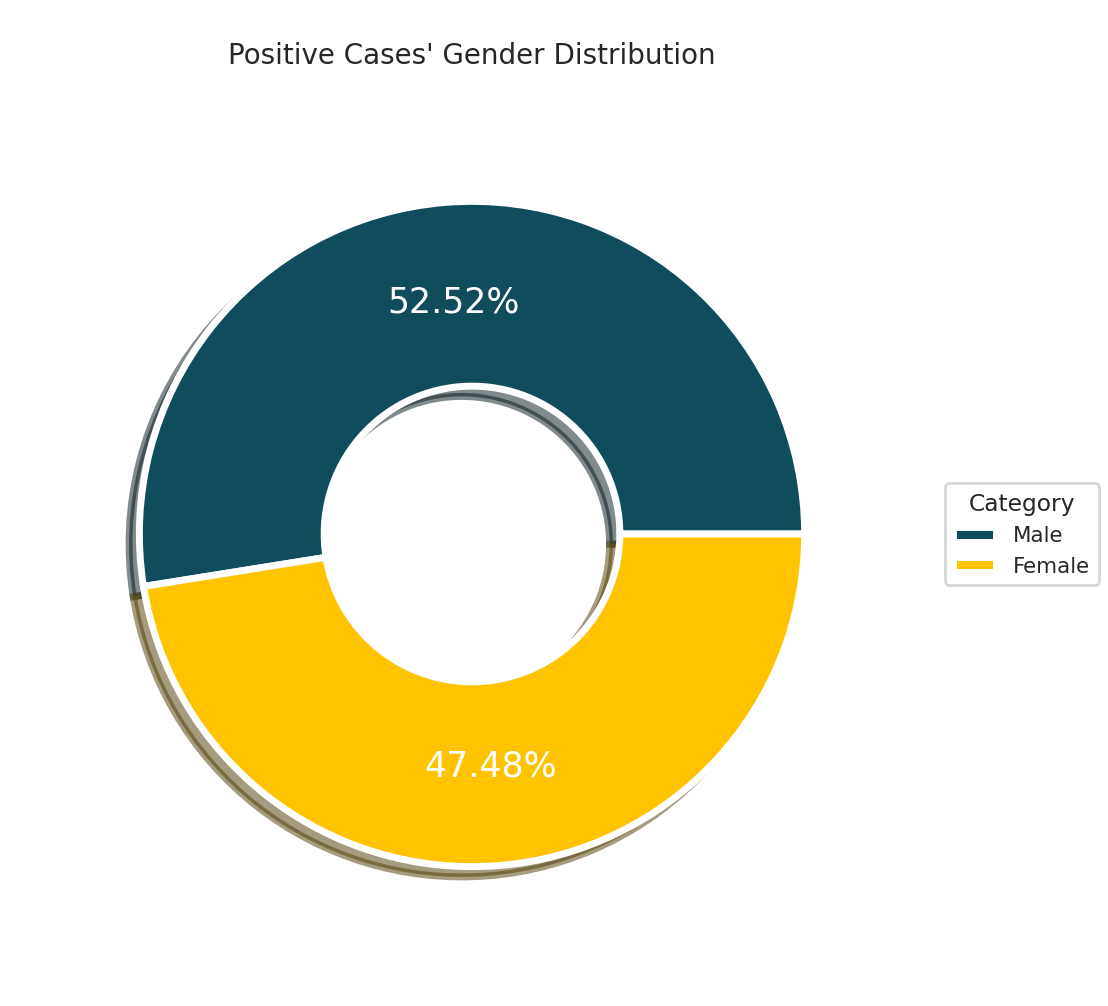

In [14]:
plt.subplots(figsize=(12, 12))

labels = "Male","Female"
size = 0.5

wedges, texts, autotexts = plt.pie([len(data_temp_pos[data_temp_pos["GENDER"]=="Male"]["GENDER"]),
                                    len(data_temp_pos[data_temp_pos["GENDER"]=="Female"]["GENDER"])],
                                    explode = (0,0),
                                    textprops=dict(size= 25, color= "white"),
                                    autopct="%.2f%%",
                                    pctdistance = 0.7,
                                    radius=.9,
                                    colors = ["#0f4c5c","#FFC300"],
                                    shadow = True,
                                    wedgeprops=dict(width = size, edgecolor = "white",
                                    linewidth = 5),
                                    startangle = 0)

plt.legend(wedges, labels, title="Category",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
plt.title("\nPositive Cases' Gender Distribution",fontsize=20)
plt.show()

**Gender-wise Positive Cases' Reasons**

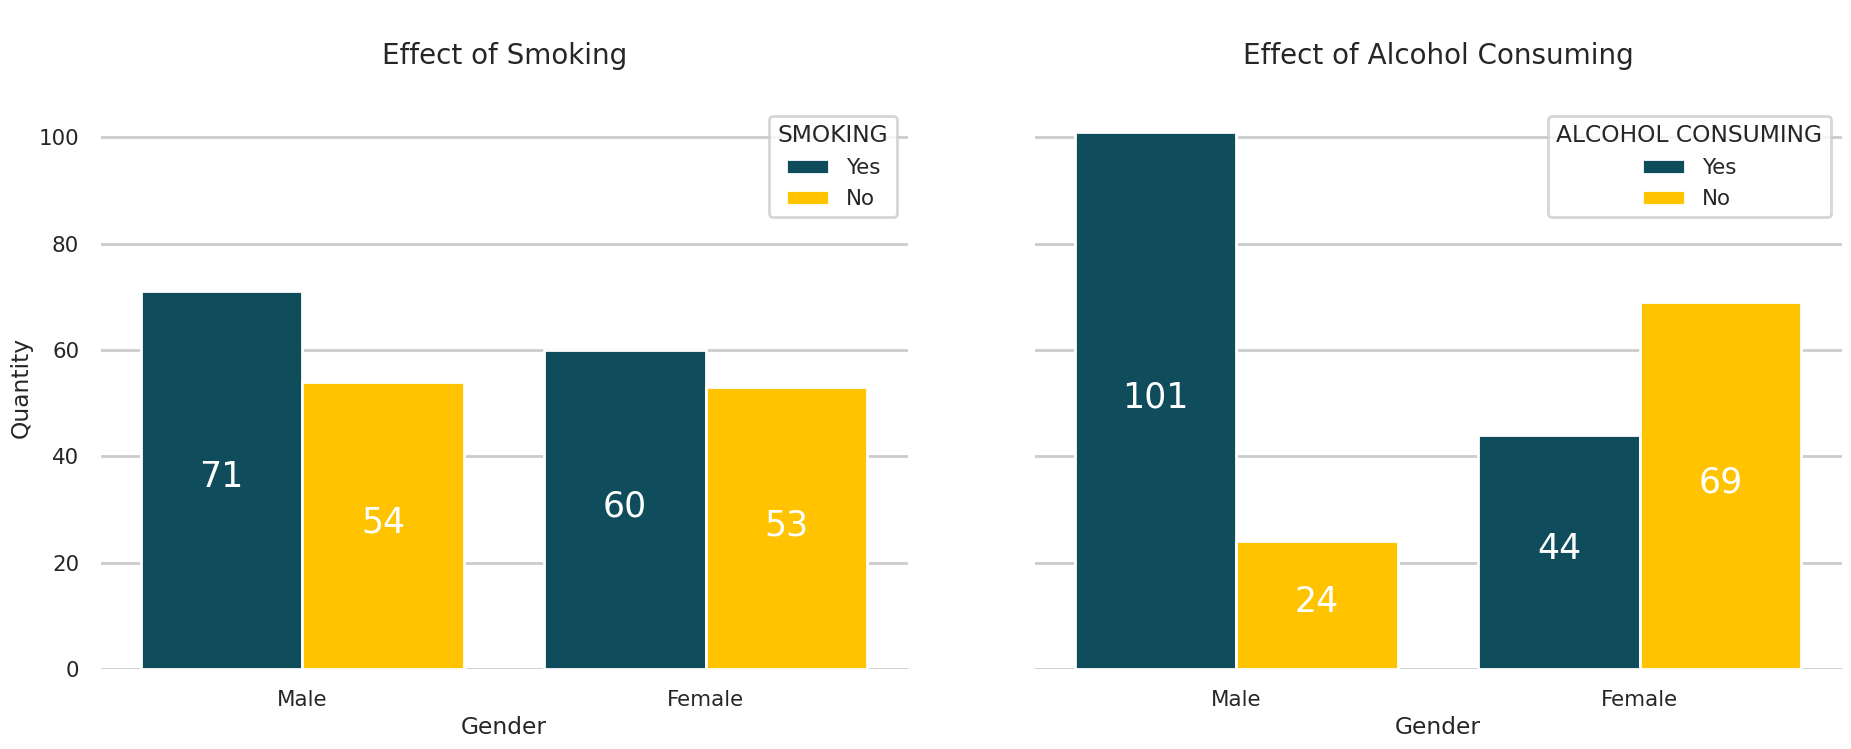

In [15]:
_, axs = plt.subplots(1,2,figsize=(20,8),sharex=True,sharey=True)
plt.tight_layout(pad=4.0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SMOKING",hue_order=["Yes","No"],ax=axs[0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0].set_title("\nEffect of Smoking\n",fontsize=20)
axs[0].set_xlabel("Gender")
axs[0].set_ylabel("Quantity")
for container in axs[0].containers:
    axs[0].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="ALCOHOL CONSUMING",hue_order=["Yes","No"],ax=axs[1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1].set_title("\nEffect of Alcohol Consuming\n",fontsize=20)
axs[1].set_xlabel("Gender")
axs[1].set_ylabel("Quantity")
for container in axs[1].containers:
    axs[1].bar_label(container,label_type="center",padding=2,size=25,color="white",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

**Gender-wise Positive Cases' Symptoms**

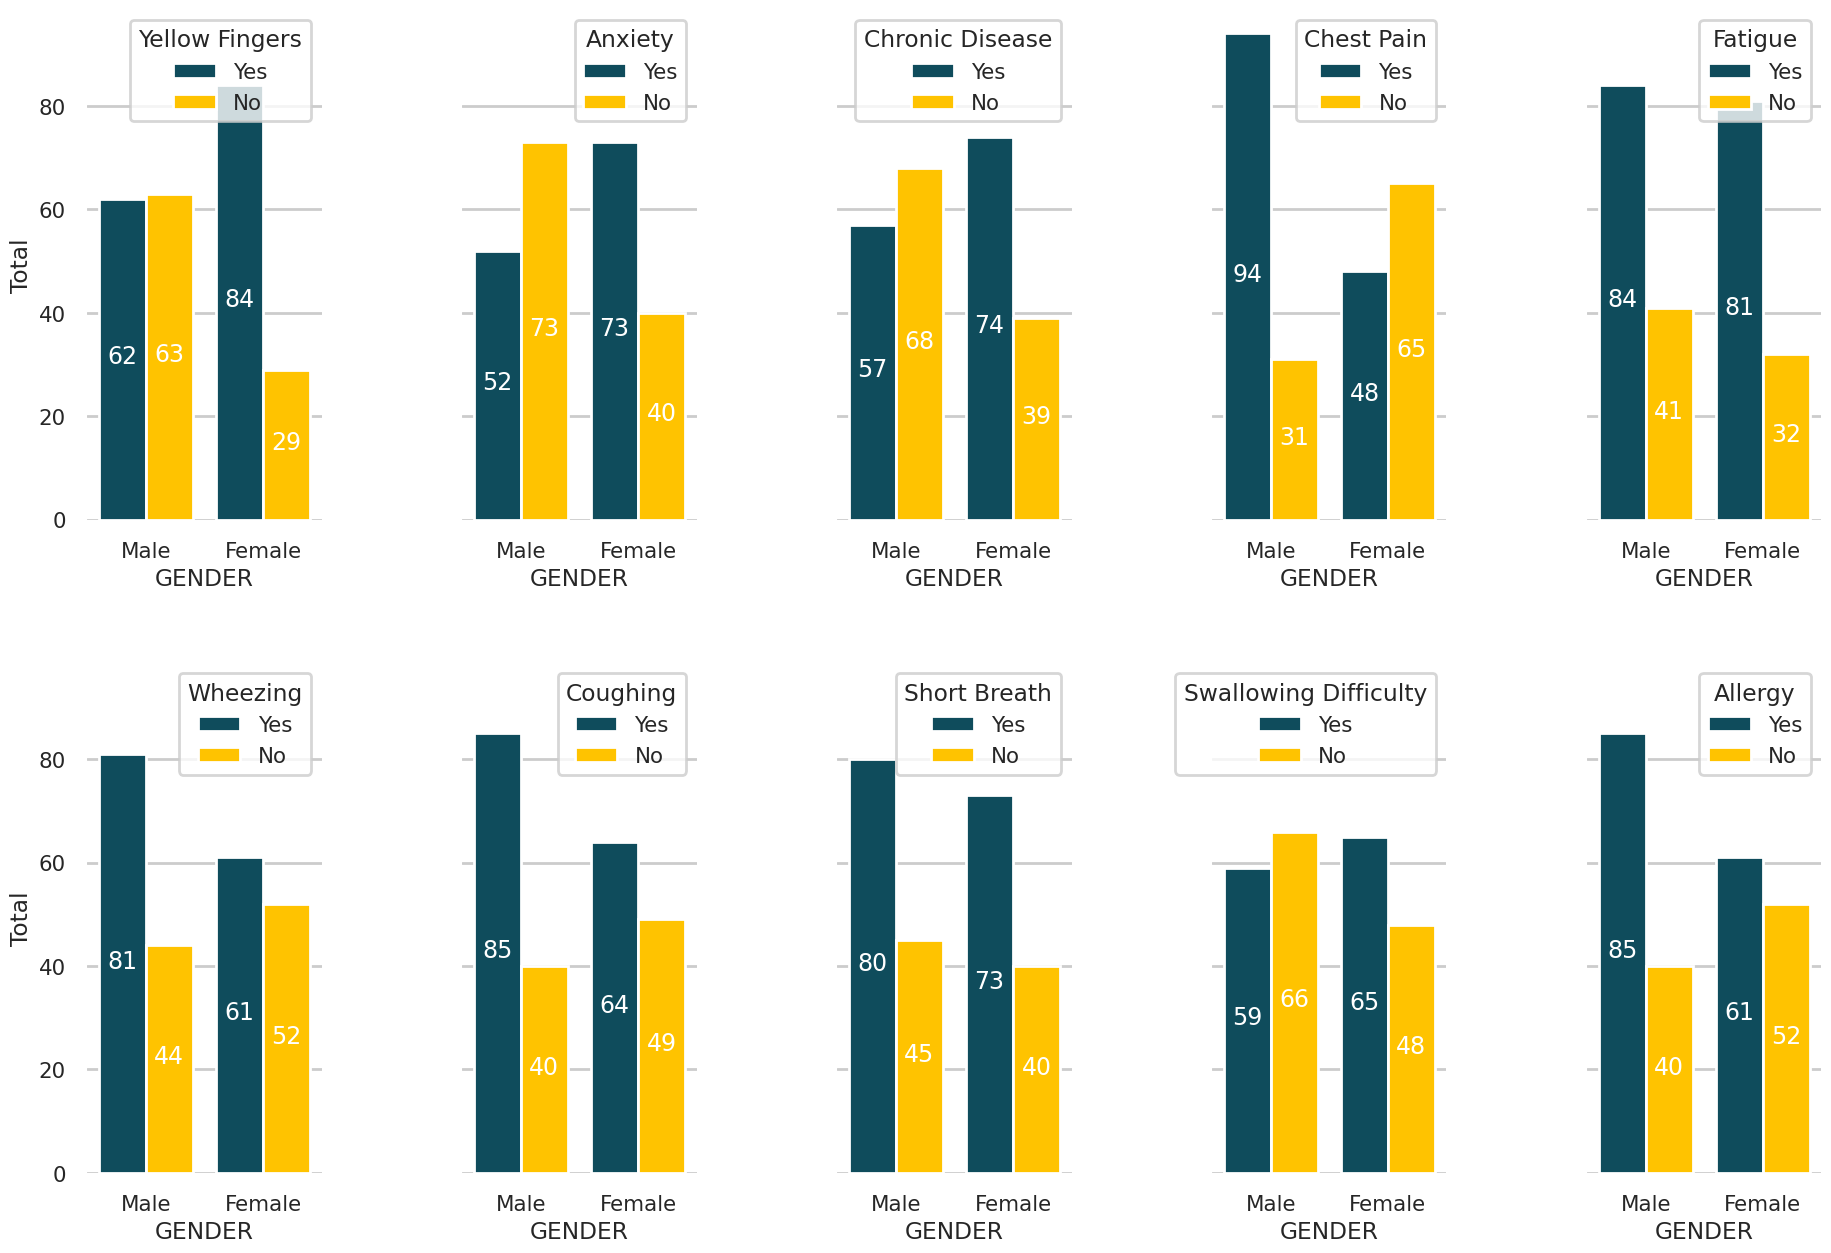

In [16]:
_, axs = plt.subplots(2,5,figsize=(20,14),sharex=False,sharey=True)
plt.tight_layout(pad=4.0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="YELLOW_FINGERS",hue_order=["Yes","No"],ax=axs[0,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,0].set_ylabel("Total")
axs[0,0].legend(title="Yellow Fingers",loc="upper right")
for container in axs[0,0].containers:
    axs[0,0].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="ANXIETY",hue_order=["Yes","No"],ax=axs[0,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,1].set_ylabel("Total")
axs[0,1].legend(title="Anxiety",loc="upper right")
for container in axs[0,1].containers:
    axs[0,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="CHRONIC DISEASE",hue_order=["Yes","No"],ax=axs[0,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,2].set_ylabel("Total")
axs[0,2].legend(title="Chronic Disease",loc="upper right")
for container in axs[0,2].containers:
    axs[0,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="CHEST PAIN",hue_order=["Yes","No"],ax=axs[0,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,3].set_ylabel("Total")
axs[0,3].legend(title="Chest Pain",loc="upper right")
for container in axs[0,3].containers:
    axs[0,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="FATIGUE ",hue_order=["Yes","No"],ax=axs[0,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[0,4].set_ylabel("Total")
axs[0,4].legend(title="Fatigue",loc="upper right")
for container in axs[0,4].containers:
    axs[0,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="WHEEZING",hue_order=["Yes","No"],ax=axs[1,0],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,0].set_ylabel("Total")
axs[1,0].legend(title="Wheezing",loc="upper right")
for container in axs[1,0].containers:
    axs[1,0].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="COUGHING",hue_order=["Yes","No"],ax=axs[1,1],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,1].set_ylabel("Total")
axs[1,1].legend(title="Coughing",loc="upper right")
for container in axs[1,1].containers:
    axs[1,1].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SHORTNESS OF BREATH",hue_order=["Yes","No"],ax=axs[1,2],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,2].set_ylabel("Total")
axs[1,2].legend(title="Short Breath",loc="upper right")
for container in axs[1,2].containers:
    axs[1,2].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="SWALLOWING DIFFICULTY",hue_order=["Yes","No"],ax=axs[1,3],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,3].set_ylabel("Total")
axs[1,3].legend(title="Swallowing Difficulty",loc="upper right")
for container in axs[1,3].containers:
    axs[1,3].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.countplot(data=data_temp_pos,x="GENDER",hue="ALLERGY ",hue_order=["Yes","No"],ax=axs[1,4],palette=["#0f4c5c","#FFC300"],saturation=1)
axs[1,4].set_ylabel("Total")
axs[1,4].legend(title="Allergy",loc="upper right")
for container in axs[1,4].containers:
    axs[1,4].bar_label(container,label_type="center",padding=2,size=17,color="white",rotation=0)

sns.despine(left=True, bottom=True)
plt.show()

**Correlation Heatmap**

In [17]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

data["GENDER"] = data["GENDER"].replace({"M" : "Male" , "F" : "Female"})
data["LUNG_CANCER"] = LabelEncoder.fit_transform(data["LUNG_CANCER"])

data = pd.get_dummies(data, columns= ["GENDER"])
data.rename(columns={"GENDER_Male" : "MALE", "GENDER_Female" : "FEMALE", "YELLOW_FINGERS" : "YELLOW FINGERS", "PEER_PRESSURE" : "PEER PRESSURE", "LUNG_CANCER" : "LUNG CANCER", "FATIGUE " : "FATIGUE", "ALLERGY " : "ALLERGY"}, inplace=True)
data = data[["AGE","MALE","FEMALE","ALCOHOL CONSUMING","CHEST PAIN","SHORTNESS OF BREATH","COUGHING","PEER PRESSURE","CHRONIC DISEASE","SWALLOWING DIFFICULTY","YELLOW FINGERS","ANXIETY","FATIGUE","ALLERGY","WHEEZING","LUNG CANCER"]]
data.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,AGE,MALE,FEMALE,ALCOHOL CONSUMING,CHEST PAIN,SHORTNESS OF BREATH,COUGHING,PEER PRESSURE,CHRONIC DISEASE,SWALLOWING DIFFICULTY,YELLOW FINGERS,ANXIETY,FATIGUE,ALLERGY,WHEEZING,LUNG CANCER
0,69,True,False,2,2,2,2,1,1,2,2,2,2,1,2,1
1,74,True,False,1,2,2,1,1,2,2,1,1,2,2,1,1
2,59,False,True,1,2,2,2,2,1,1,1,1,2,1,2,0
3,63,True,False,2,2,1,1,1,1,2,2,2,1,1,1,0
4,63,False,True,1,1,2,2,1,1,1,2,1,1,1,2,0


**Correlation Heatmap**

In [20]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()
data["LUNG CANCER"] = LabelEncoder.fit_transform(data["LUNG CANCER"])  # Changed column name

data = data[["AGE","MALE","FEMALE","ALCOHOL CONSUMING","CHEST PAIN","SHORTNESS OF BREATH","COUGHING","PEER PRESSURE","CHRONIC DISEASE","SWALLOWING DIFFICULTY","YELLOW FINGERS","ANXIETY","FATIGUE","ALLERGY","WHEEZING","LUNG CANCER"]]  # Make sure column order is as expected
data.head().style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1.5px  solid black"})

,AGE,MALE,FEMALE,ALCOHOL CONSUMING,CHEST PAIN,SHORTNESS OF BREATH,COUGHING,PEER PRESSURE,CHRONIC DISEASE,SWALLOWING DIFFICULTY,YELLOW FINGERS,ANXIETY,FATIGUE,ALLERGY,WHEEZING,LUNG CANCER
0,69,True,False,2,2,2,2,1,1,2,2,2,2,1,2,1
1,74,True,False,1,2,2,1,1,2,2,1,1,2,2,1,1
2,59,False,True,1,2,2,2,2,1,1,1,1,2,1,2,0
3,63,True,False,2,2,1,1,1,1,2,2,2,1,1,1,0
4,63,False,True,1,1,2,2,1,1,1,2,1,1,1,2,0


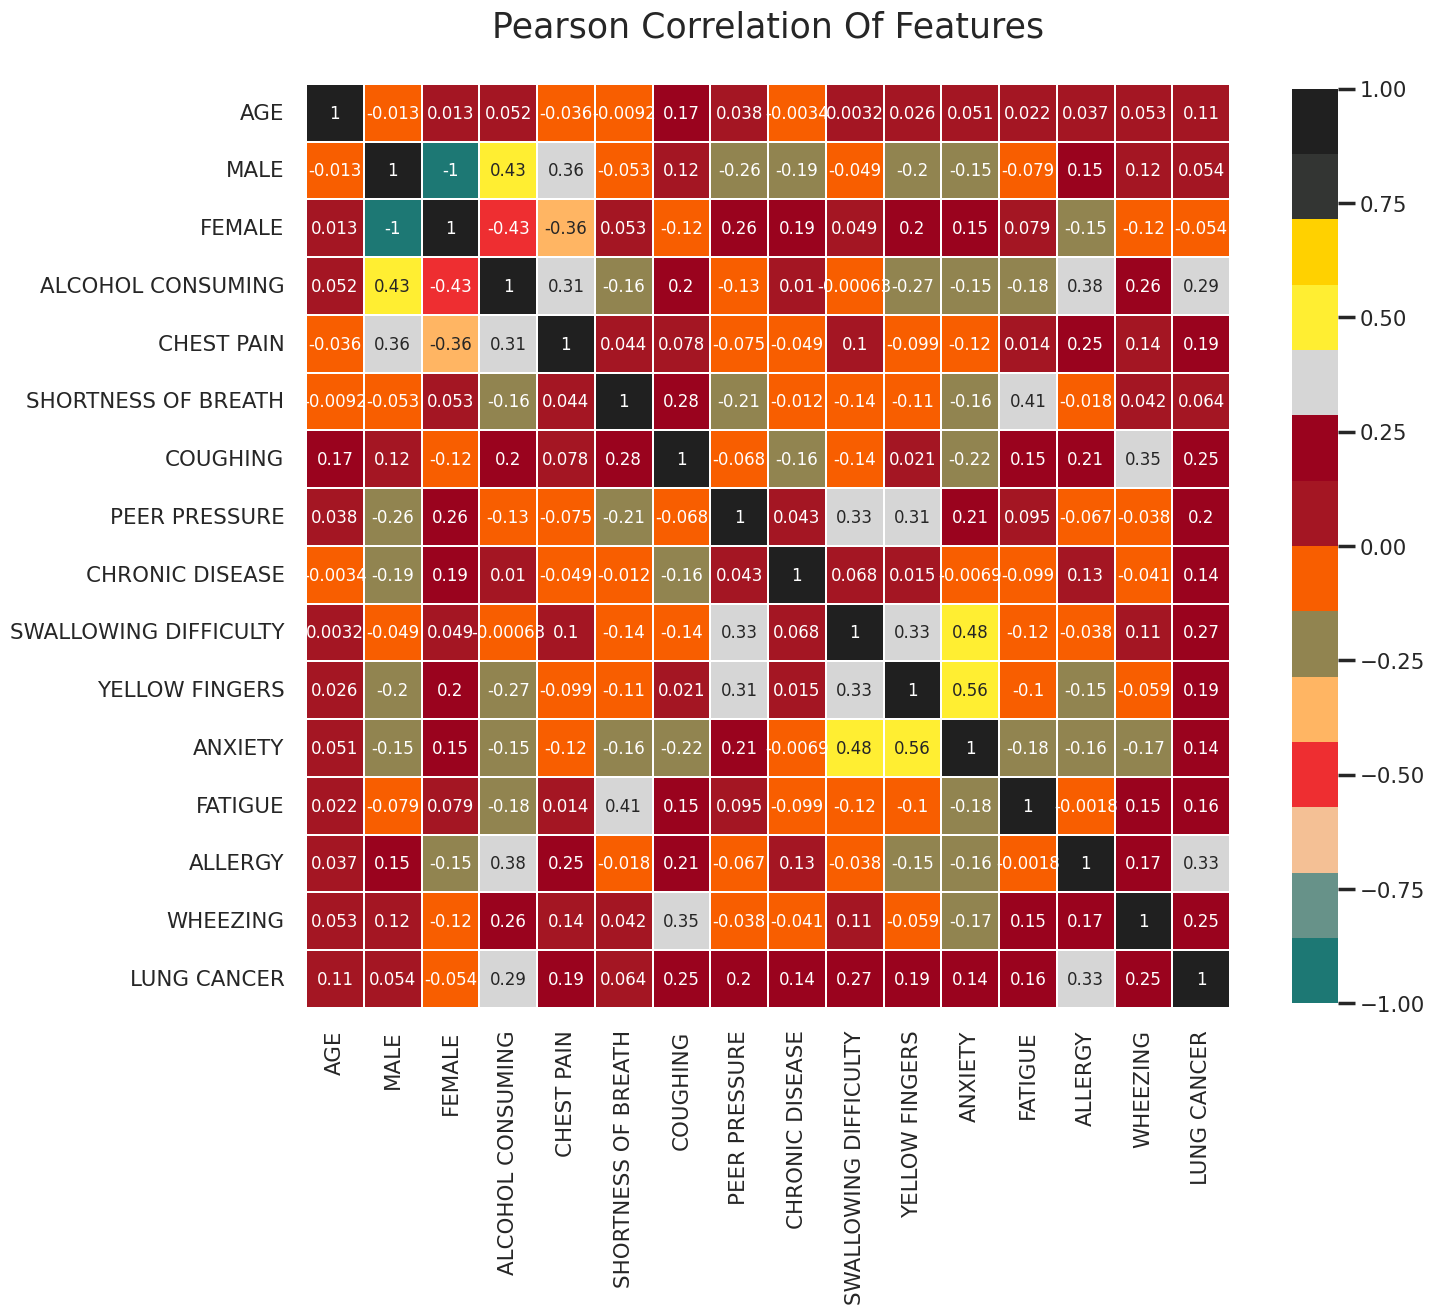

In [21]:
plt.subplots(figsize =(16, 12))

p=sns.heatmap(data.corr(), cmap = palette, square=True, cbar_kws=dict(shrink =.99),
            annot=True, vmin=-1, vmax=1, linewidths=0.1,linecolor='white',annot_kws=dict(fontsize =12))
p.axes.set_title("Pearson Correlation Of Features\n", fontsize=25)
plt.xticks(rotation=90)
plt.show()

**Preprocessing For Classification**

In [22]:
x = data.drop("LUNG CANCER", axis = 1)
y = data["LUNG CANCER"]

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x = scaler.fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

print(f"Shape of training data : {x_train.shape}, {y_train.shape}")
print(f"Shape of testing data : {x_test.shape}, {y_test.shape}")

Shape of training data : (220, 15), (220,)
Shape of testing data : (56, 15), (56,)


**Logistic Regression Model**

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)
lr_conf = confusion_matrix(y_test, lr_pred)
lr_report = classification_report(y_test, lr_pred)
lr_acc = round(accuracy_score(y_test, lr_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{lr_conf}")
print(f"\nClassification Report : \n\n{lr_report}")
print(f"\nThe Accuracy of Logistic Regression is {lr_acc} %")

Confusion Matrix : 

[[ 5  7]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      0.88      0.85        56


The Accuracy of Logistic Regression is 87.5 %


**Support Vector Machine Model**

In [25]:
from sklearn.svm import SVC

svm = SVC(C = 100, gamma = 0.002)
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
svm_conf = confusion_matrix(y_test, svm_pred)
svm_report = classification_report(y_test, svm_pred)
svm_acc = round(accuracy_score(y_test, svm_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{svm_conf}")
print(f"\nClassification Report : \n\n{svm_report}")
print(f"\nThe Accuracy of Support Vector Machine is {svm_acc} %")

Confusion Matrix : 

[[ 4  8]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56


The Accuracy of Support Vector Machine is 85.71 %


**Random Forest Model**

In [26]:
from sklearn.ensemble import RandomForestClassifier

rfg = RandomForestClassifier(n_estimators = 100, random_state = 42)
rfg.fit(x_train, y_train)
rfg_pred = rfg.predict(x_test)
rfg_conf = confusion_matrix(y_test, rfg_pred)
rfg_report = classification_report(y_test, rfg_pred)
rfg_acc = round(accuracy_score(y_test, rfg_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{rfg_conf}")
print(f"\nClassification Report : \n\n{rfg_report}")
print(f"\nThe Accuracy of Random Forest Classifier is {rfg_acc} %")

Confusion Matrix : 

[[ 4  8]
 [ 0 44]]

Classification Report : 

              precision    recall  f1-score   support

           0       1.00      0.33      0.50        12
           1       0.85      1.00      0.92        44

    accuracy                           0.86        56
   macro avg       0.92      0.67      0.71        56
weighted avg       0.88      0.86      0.83        56


The Accuracy of Random Forest Classifier is 85.71 %


**K Nearest Neighbors Model**

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_conf = confusion_matrix(y_test, knn_pred)
knn_report = classification_report(y_test, knn_pred)
knn_acc = round(accuracy_score(y_test, knn_pred)*100, ndigits = 2)
print(f"Confusion Matrix : \n\n{knn_conf}")
print(f"\nClassification Report : \n\n{knn_report}")
print(f"\nThe Accuracy of K Nearest Neighbors Classifier is {knn_acc} %")

Confusion Matrix : 

[[ 9  3]
 [ 1 43]]

Classification Report : 

              precision    recall  f1-score   support

           0       0.90      0.75      0.82        12
           1       0.93      0.98      0.96        44

    accuracy                           0.93        56
   macro avg       0.92      0.86      0.89        56
weighted avg       0.93      0.93      0.93        56


The Accuracy of K Nearest Neighbors Classifier is 92.86 %


In [30]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

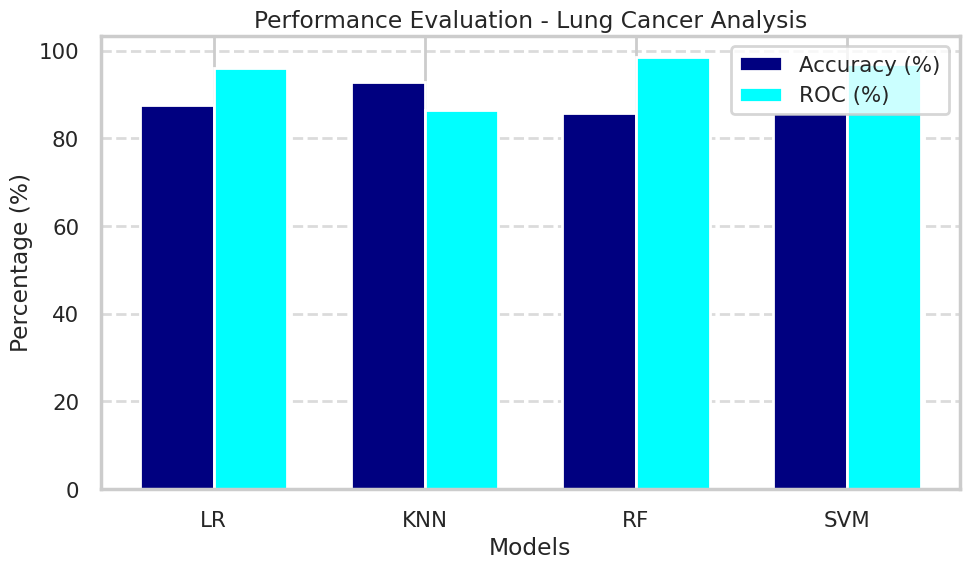

In [31]:
# Convert y_test to numeric using correct mapping
y_test_numeric = y_test.map({0: 0, 1: 1})

# Initialize lists to store metrics
models = ['LR', 'KNN', 'RF', 'SVM']
accuracy_scores = []
roc_scores = []

# Logistic Regression
lr_pred = lr.predict(x_test)
lr_prob = lr.predict_proba(x_test)[:, 1]  # Probability for positive class (YES)
accuracy_scores.append(accuracy_score(y_test, lr_pred) * 100)
roc_scores.append(roc_auc_score(y_test_numeric, lr_prob) * 100)

# K-Nearest Neighbors
knn_pred = knn.predict(x_test)
knn_prob = knn.predict_proba(x_test)[:, 1]
accuracy_scores.append(accuracy_score(y_test, knn_pred) * 100)
roc_scores.append(roc_auc_score(y_test_numeric, knn_prob) * 100)

# Random Forest
rfg_pred = rfg.predict(x_test)
rfg_prob = rfg.predict_proba(x_test)[:, 1]
accuracy_scores.append(accuracy_score(y_test, rfg_pred) * 100)
roc_scores.append(roc_auc_score(y_test_numeric, rfg_prob) * 100)

# Support Vector Machine
svm_pred = svm.predict(x_test)
# SVC with default kernel doesn't have predict_proba; use decision_function for ROC
svm_prob = svm.decision_function(x_test)
accuracy_scores.append(accuracy_score(y_test, svm_pred) * 100)
roc_scores.append(roc_auc_score(y_test_numeric, svm_prob) * 100)

# Create bar plot
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(models))

# Plot Accuracy bars
plt.bar(index, accuracy_scores, bar_width, label='Accuracy (%)', color='navy')

# Plot ROC bars
plt.bar(index + bar_width, roc_scores, bar_width, label='ROC (%)', color='cyan')

# Customize plot
plt.xlabel('Models')
plt.ylabel('Percentage (%)')
plt.title('Performance Evaluation - Lung Cancer Analysis')
plt.xticks(index + bar_width / 2, models)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

**Confusion Matrix on All Model**

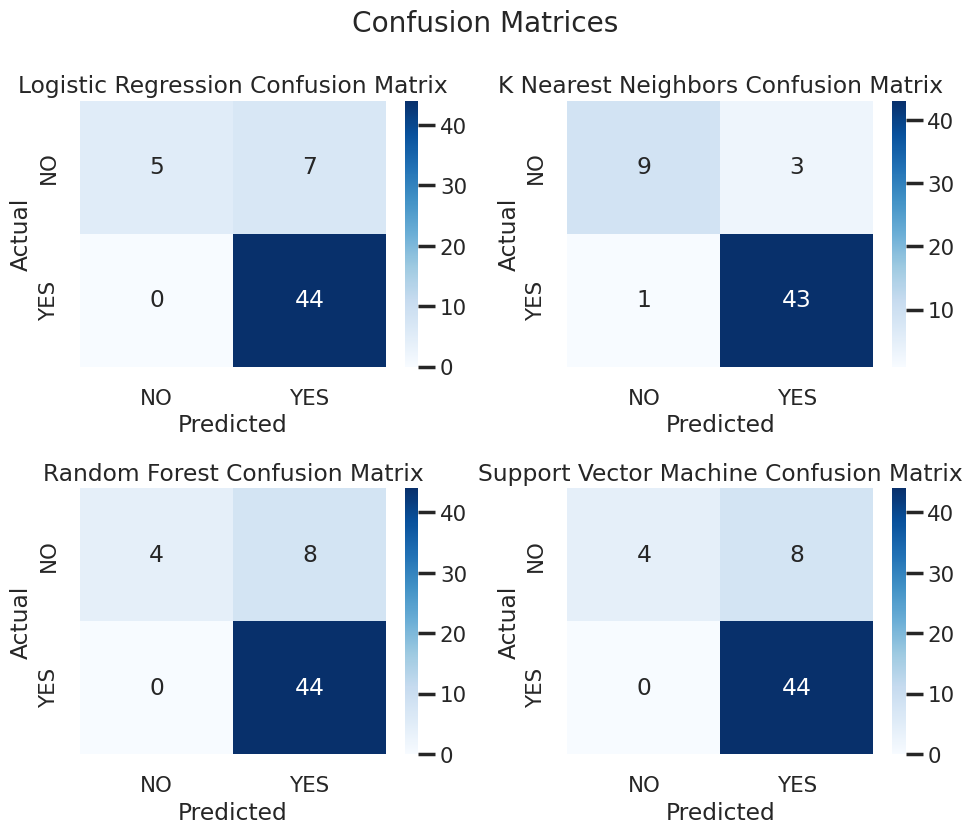

In [36]:
lr_pred = lr.predict(x_test)

svc = SVC(C=100, gamma=0.002)
svc.fit(x_train, y_train)

svc_pred = svc.predict(x_test)

rf_pred = rfg.predict(x_test)
knn_pred = knn.predict(x_test)


cm_lr = confusion_matrix(y_test, lr_pred, labels=[0, 1])
cm_svc = confusion_matrix(y_test, svc_pred, labels=[0, 1])
cm_rf = confusion_matrix(y_test, rf_pred, labels=[0, 1])
cm_knn = confusion_matrix(y_test, knn_pred, labels=[0, 1])

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

model_names = ['Logistic Regression', 'K Nearest Neighbors', 'Random Forest', 'Support Vector Machine']
cms = [cm_lr, cm_knn, cm_rf, cm_svc]

for ax, cm, model_name in zip(axes.flatten(), cms, model_names):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
                xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(f'{model_name} Confusion Matrix')

plt.tight_layout()
plt.suptitle('Confusion Matrices', y=1.05)
plt.show()

**ROC - Curve on Applied Testing Models**

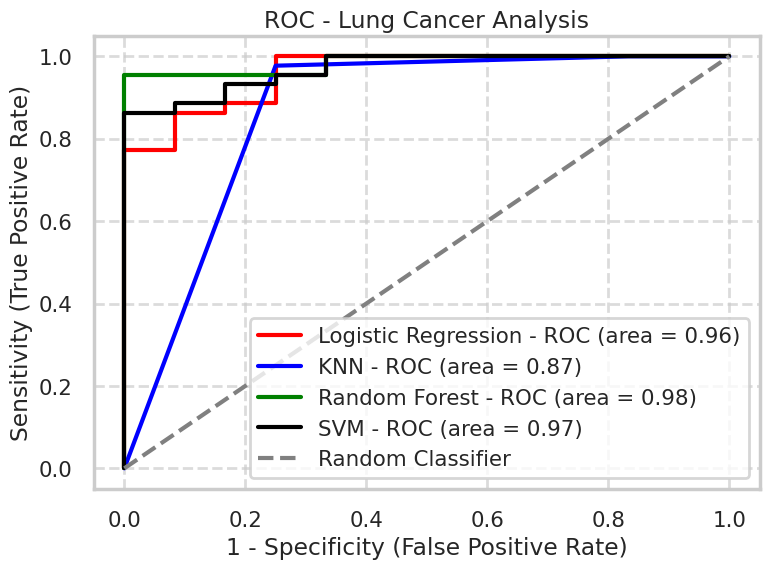

In [38]:
y_test_numeric = y_test.map({0: 0, 1: 1}).fillna(0)

# Initialize lists for ROC curve data
models = ['Logistic Regression', 'KNN', 'Random Forest', 'SVM']
colors = ['red', 'blue', 'green', 'black']
roc_data = []

# Compute ROC curve and AUC for each model
# Logistic Regression
lr_prob = lr.predict_proba(x_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test_numeric, lr_prob)
auc_lr = roc_auc_score(y_test_numeric, lr_prob)
roc_data.append((fpr_lr, tpr_lr, auc_lr, models[0], colors[0]))

# K-Nearest Neighbors
knn_prob = knn.predict_proba(x_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test_numeric, knn_prob)
auc_knn = roc_auc_score(y_test_numeric, knn_prob)
roc_data.append((fpr_knn, tpr_knn, auc_knn, models[1], colors[1]))

# Random Forest
rf_prob = rfg.predict_proba(x_test)[:, 1]  # Use rfg (your RandomForestClassifier)
fpr_rf, tpr_rf, _ = roc_curve(y_test_numeric, rf_prob)
auc_rf = roc_auc_score(y_test_numeric, rf_prob)
roc_data.append((fpr_rf, tpr_rf, auc_rf, models[2], colors[2]))

# Support Vector Machine (using decision_function since probability=False)
svc_prob = svc.decision_function(x_test)
fpr_svc, tpr_svc, _ = roc_curve(y_test_numeric, svc_prob)
auc_svc = roc_auc_score(y_test_numeric, svc_prob)
roc_data.append((fpr_svc, tpr_svc, auc_svc, models[3], colors[3]))

# Create ROC curve plot
plt.figure(figsize=(8, 6))

# Plot ROC curve for each model
for fpr, tpr, auc, model_name, color in roc_data:
    plt.plot(fpr, tpr, color=color, label=f'{model_name} - ROC (area = {auc:.2f})')

# Plot random classifier line (diagonal)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Classifier')

# Customize plot
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('ROC - Lung Cancer Analysis')
plt.legend(loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

**Dataset Source:** https://www.kaggle.com/datasets/ajisofyan/survey-lung-cancer/data